#### Importing necessary libraries

In [1]:
# Import NumPy for numerical operations
import numpy as np  
# Import TensorFlow for building and training the neural network
import tensorflow as tf  
# Import layers and models from Keras for constructing the CNN
from tensorflow.keras import layers, models  
# Import Fashion MNIST dataset from Keras datasets
from tensorflow.keras.datasets import fashion_mnist  
# Import Matplotlib for visualizing images and predictions
import matplotlib.pyplot as plt

#### Loading the dataset

In [2]:
# Load the Fashion MNIST dataset into training and testing data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()  

# Normalize pixel values to a range of 0 to 1 for faster convergence
x_train = x_train / 255.0  
x_test = x_test / 255.0  

# Reshape the training and testing data to include the channel dimension (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)  
x_test = x_test.reshape(-1, 28, 28, 1)  

#### Display images in the dataset

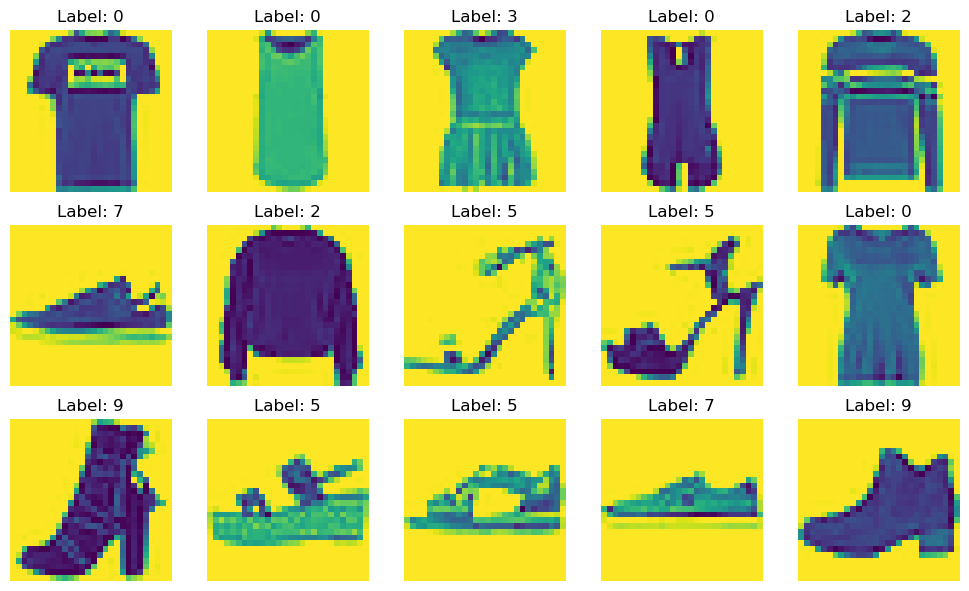

In [3]:
# Define the number of rows and columns for the grid
rows, cols = 3, 5  

# Create a new figure for the grid
plt.figure(figsize=(10, 6))  

# Loop through the first rows and columns images in the dataset
for num in range(1, rows * cols + 1):
    # Add a subplot in the grid
    plt.subplot(rows, cols, num)  
    
    # Remove the channel dimension and display the image
    plt.imshow(x_train[num].squeeze(), cmap='viridis_r')  
    
    # Add the corresponding label as the title
    plt.title(f"Label: {y_train[num]}")  
    
    # Turn off the axes
    plt.axis('off')  

# Show the grid of images
plt.tight_layout()  
plt.show()

#### Defining the class to handle the model

In [4]:
# Define a class to construct and manage the CNN model
class FashionModel:
    # Initialize the model
    def __init__(self):
        self.model = self.build_model()  # Call method to build the CNN model

    # Define the structure of the CNN model
    def build_model(self):
        # Create a sequential model
        model = models.Sequential()  
        
        # Add the first convolutional layer with 32 filters and 3x3 kernel size
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  
        
        # Add the first pooling layer with 2x2 pool size to reduce spatial dimensions
        model.add(layers.MaxPooling2D((2, 2)))  
        
        # Add the second convolutional layer with 64 filters and 3x3 kernel size
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
        
        # Add the second pooling layer with 2x2 pool size
        model.add(layers.MaxPooling2D((2, 2)))  
        
        # Flatten the 2D feature maps into a 1D vector for the dense layers
        model.add(layers.Flatten())  
        
        # Add a fully connected dense layer with 128 neurons and ReLU activation
        model.add(layers.Dense(128, activation='relu'))  
        
        # Add the output layer with 10 neurons (one for each class) and softmax activation
        model.add(layers.Dense(10, activation='softmax'))  
        
        # Return the constructed model
        return model  

    # Compile the model with optimization and loss functions
    def compile(self):
        # Use Adam optimizer and sparse categorical cross-entropy loss
        self.model.compile(optimizer='adam',  
                           loss='sparse_categorical_crossentropy',  
                           metrics=['accuracy'])  # Evaluate accuracy during training/testing

    # Train the model using training data
    def train(self, x_train, y_train, epochs=5):
        # Fit the model on the training data for the specified number of epochs
        self.model.fit(x_train, y_train, epochs=epochs)  

    # Evaluate the model's performance on the test data
    def evaluate(self, x_test, y_test):
        # Compute the loss and accuracy on the test data
        return self.model.evaluate(x_test, y_test)  

    # Make predictions for given samples
    def predict(self, x_sample):
        # Predict the class probabilities and return the class with the highest probability
        return np.argmax(self.model.predict(x_sample), axis=-1)  

#### Initializing the model and evaluating its performance

In [5]:
# Create an instance of the FashionMNISTModel class
cnn_model = FashionModel()  

# Compile the CNN model to prepare it for training
cnn_model.compile()  

# Train the CNN model using the training data for 5 epochs
cnn_model.train(x_train, y_train, epochs=5)  

# Evaluate the CNN model's performance on the test dataset
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)  
# Print the test accuracy
print(f"Test Accuracy: {test_acc:.2f}")  

C:\Users\DELL\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.7799 - loss: 0.6230
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.8855 - loss: 0.3178
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9039 - loss: 0.2617
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9178 - loss: 0.2199
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9281 - loss: 0.1945
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8995 - loss: 0.2782
Test Accuracy: 0.90


#### Making Predictions

In [6]:
# Select two random indices from the test dataset
sample_index = np.random.choice(len(x_test), 2, replace=False)  

# Get the images corresponding to the selected indices
sample_images = x_test[sample_index]  

# Get the true labels of the selected samples
sample_labels = y_test[sample_index]  

# Use the trained model to make predictions on the selected images
predictions = cnn_model.predict(sample_images)  

# Define the class names for each label in the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',  
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


#### Using visuals to see performance of the model

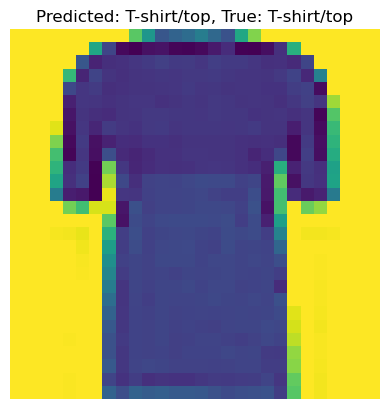

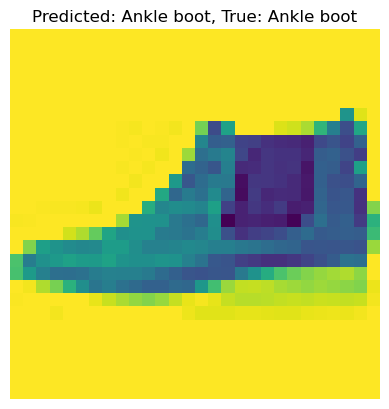

In [23]:
# Loop through each selected image to display it along with predictions
for num, img in enumerate(sample_images):
    # Display the image in grayscale
    plt.imshow(img.squeeze(), cmap='viridis_r')  
    
    # Set the title of the plot to show predicted and true labels
    plt.title(f"Predicted: {class_names[predictions[num]]}, True: {class_names[sample_labels[num]]}")  
    
    # Turn off axes for better visualization
    plt.axis('off')  
    
    # Show the plot
    plt.show()  